In [2]:
# NBA Prediction Data Sci Model
# Installing required libraries
!pip install pandas numpy scikit-learn matplotlib seaborn

In [3]:
#import libraries needed for model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve, auc

STEP 1: INITIAL SETUP and DATA UNDERSTANDING

In [4]:
# Naming files (setup file paths for the data files)
train_file = "/content/NBA_train.csv"
test_file = "/content/NBA_test.csv"
sample_submission_file = "/content/NBA_sample_submission.csv" #to cross-check final file vs. sample submission

In [5]:
# Step 1: Initial Setup and Data Understanding
# Load the datasets into pandas dataframes
train_df = pd.read_csv(train_file)
test_df = pd.read_csv(test_file)

In [6]:
# summary train dataset
print("Train Dataset Info:\n")
print(train_df.info())
print("\nTrain Dataset Head:\n", train_df.head())

print("Training Data Sample:")
print(train_df.head())

Train Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           8000 non-null   int64  
 1   GP           8000 non-null   int64  
 2   MIN          8000 non-null   float64
 3   PTS          8000 non-null   float64
 4   FGM          8000 non-null   float64
 5   FGA          8000 non-null   float64
 6   FG%          8000 non-null   float64
 7   3P Made      8000 non-null   float64
 8   3PA          8000 non-null   float64
 9   3P%          8000 non-null   float64
 10  FTM          8000 non-null   float64
 11  FTA          8000 non-null   float64
 12  FT%          8000 non-null   float64
 13  OREB         8000 non-null   float64
 14  DREB         8000 non-null   float64
 15  REB          8000 non-null   float64
 16  AST          8000 non-null   float64
 17  STL          8000 non-null   float64
 18  BLK          8000 non-null 

In [7]:
# summary test dataset
print("Test Dataset Info:\n")
print(test_df.info())
print("\nTest Dataset Head:\n", test_df.head())

print("\nTest Data Sample:")
print(test_df.head())

Test Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3799 entries, 0 to 3798
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       3799 non-null   int64  
 1   GP       3799 non-null   int64  
 2   MIN      3799 non-null   float64
 3   PTS      3799 non-null   float64
 4   FGM      3799 non-null   float64
 5   FGA      3799 non-null   float64
 6   FG%      3799 non-null   float64
 7   3P Made  3799 non-null   float64
 8   3PA      3799 non-null   float64
 9   3P%      3799 non-null   float64
 10  FTM      3799 non-null   float64
 11  FTA      3799 non-null   float64
 12  FT%      3799 non-null   float64
 13  OREB     3799 non-null   float64
 14  DREB     3799 non-null   float64
 15  REB      3799 non-null   float64
 16  AST      3799 non-null   float64
 17  STL      3799 non-null   float64
 18  BLK      3799 non-null   float64
 19  TOV      3799 non-null   float64
dtypes: float64(18), int64(2)
memory 

In [8]:
# Check missing values in both datasets
print("\nMissing Values in Train Dataset:\n", train_df.isnull().sum())
print("\nMissing Values in Test Dataset:\n", test_df.isnull().sum())


Missing Values in Train Dataset:
 Id             0
GP             0
MIN            0
PTS            0
FGM            0
FGA            0
FG%            0
3P Made        0
3PA            0
3P%            0
FTM            0
FTA            0
FT%            0
OREB           0
DREB           0
REB            0
AST            0
STL            0
BLK            0
TOV            0
TARGET_5Yrs    0
dtype: int64

Missing Values in Test Dataset:
 Id         0
GP         0
MIN        0
PTS        0
FGM        0
FGA        0
FG%        0
3P Made    0
3PA        0
3P%        0
FTM        0
FTA        0
FT%        0
OREB       0
DREB       0
REB        0
AST        0
STL        0
BLK        0
TOV        0
dtype: int64


In [9]:
# Check for duplicate rows in the training and test datasets
print(train_df.duplicated().sum())
print(test_df.duplicated().sum())

0
0


In [10]:
# Check for outliers in numeric columns
print("\nChecking for outliers in numeric columns:")

# Define numeric_cols here using the select_dtypes method
numeric_cols = train_df.select_dtypes(include=['number']).columns

for col in numeric_cols:
    print(f"{col}: Max = {train_df[col].max()}, Min = {train_df[col].min()}")


Checking for outliers in numeric columns:
Id: Max = 11798, Min = 3799
GP: Max = 123, Min = -8
MIN: Max = 73.8, Min = 2.9
PTS: Max = 34.2, Min = 0.8
FGM: Max = 13.1, Min = 0.3
FGA: Max = 28.9, Min = 0.8
FG%: Max = 67.2, Min = 21.3
3P Made: Max = 1.7, Min = -1.1
3PA: Max = 4.7, Min = -3.1
3P%: Max = 82.1, Min = -38.5
FTM: Max = 8.1, Min = 0.0
FTA: Max = 11.1, Min = 0.0
FT%: Max = 168.9, Min = -13.3
OREB: Max = 5.5, Min = 0.0
DREB: Max = 11.0, Min = 0.2
REB: Max = 15.9, Min = 0.3
AST: Max = 12.8, Min = 0.0
STL: Max = 3.6, Min = 0.0
BLK: Max = 18.9, Min = -17.9
TOV: Max = 5.3, Min = 0.1
TARGET_5Yrs: Max = 1, Min = 0


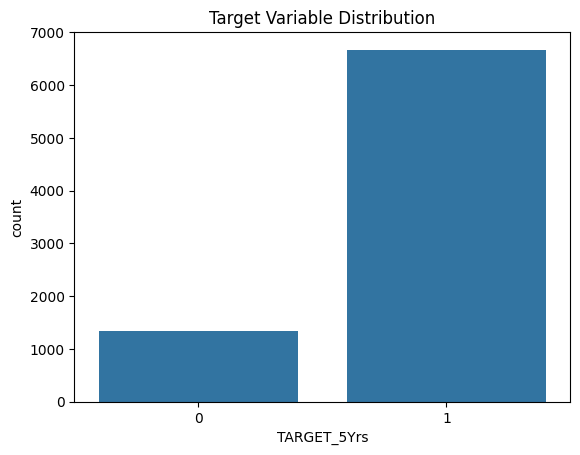

In [11]:
# Visualise target variable distribution
sns.countplot(x='TARGET_5Yrs', data=train_df)
plt.title("Target Variable Distribution")
plt.show()

In [12]:
# Check for class imbalance in the training dataset
print("\nClass Distribution in Training Data:")
print(train_df['TARGET_5Yrs'].value_counts(normalize=True) * 100)  # Percentage of each class


Class Distribution in Training Data:
TARGET_5Yrs
1    83.3625
0    16.6375
Name: proportion, dtype: float64


The above shows a class imbalance of 83% for one class and 16% for the other. Discrepancy will affect the model performance favouring one class over the other. We will use handling for class imbalance ensuring fair model evaluation at a later stage in this project.

STEP 2: EXPLORATORY DATA ANALYSIS

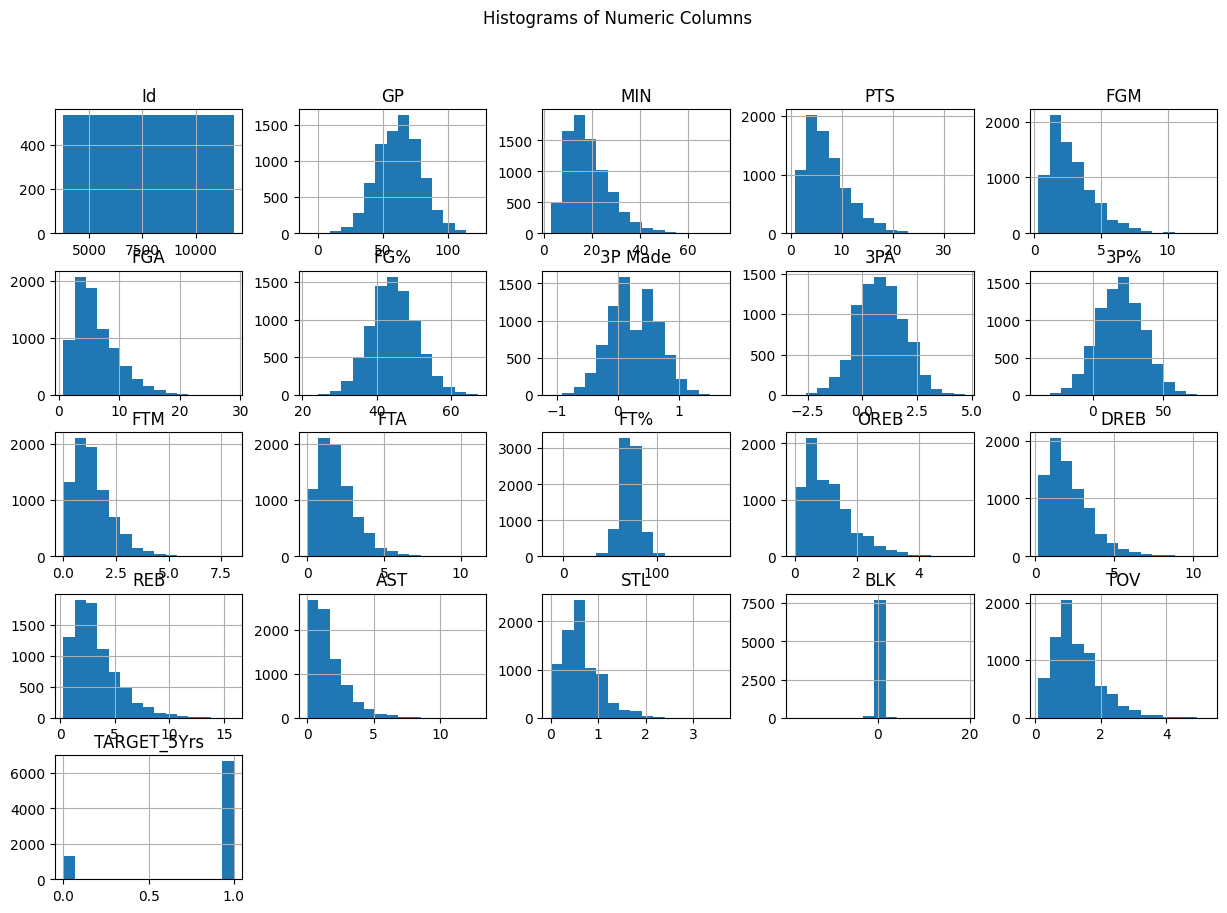

In [13]:
# Plot histograms of numeric columns
import matplotlib.pyplot as plt
import seaborn as sns
train_df[numeric_cols].hist(bins=15, figsize=(15, 10))
plt.suptitle("Histograms of Numeric Columns")
plt.show()

The data has a variety of distributions, with some features being highly skewed (e.g., PTS, GP, MIN). These observations could guide feature scaling and transformation choices during preprocessing.

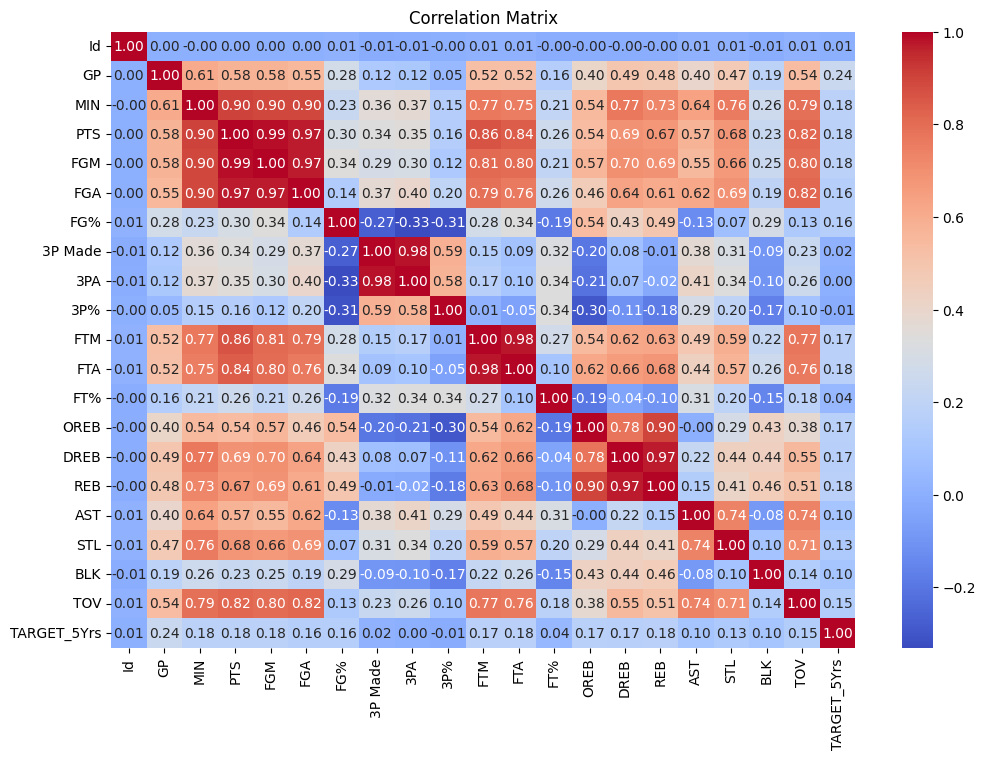

In [14]:
# Correlation matrix
correlation_matrix = train_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

There are strong correlations between features that represent similar metrics or outcomes (e.g., PTS, FGM, FGA). This suggests potential redundancy or multicollinearity in the dataset, which may affect model performance if not addressed. The target variable does not strongly correlate with individual features, indicating the need for complex feature interactions for prediction.

STEP 3: DATA PREPROCESSING - Feature Scaling

In [15]:
# Feature scaling to make numeric features easier for the model to work with
from sklearn.preprocessing import MinMaxScaler

numeric_cols = train_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_cols.remove('TARGET_5Yrs')  # Remove the target column because we don't scale it
if 'Id' in numeric_cols:  # Ensure 'Id' is excluded
    numeric_cols.remove('Id')

In [16]:
# Use MinMaxScaler to scale the data to 0-1 range
scaler = MinMaxScaler()
train_df[numeric_cols] = scaler.fit_transform(train_df[numeric_cols])  # Scale training data
test_df[numeric_cols] = scaler.transform(test_df[numeric_cols])  # Scale test data

In [17]:
# Clip test data to ensure all values are within [0, 1] (ran into issues with negative values i.e., out of range)
test_df[numeric_cols] = test_df[numeric_cols].clip(0, 1)

In [18]:
# Verify scaling for the training dataset
print("\nScaled Training Data Range:")
for col in numeric_cols:
    print(f"{col}: Min = {train_df[col].min()}, Max = {train_df[col].max()}")


Scaled Training Data Range:
GP: Min = 0.0, Max = 1.0
MIN: Min = 0.0, Max = 1.0000000000000002
PTS: Min = 0.0, Max = 1.0
FGM: Min = 0.0, Max = 1.0
FGA: Min = 0.0, Max = 1.0000000000000002
FG%: Min = 0.0, Max = 1.0
3P Made: Min = 0.0, Max = 1.0
3PA: Min = 0.0, Max = 1.0
3P%: Min = 0.0, Max = 1.0
FTM: Min = 0.0, Max = 1.0
FTA: Min = 0.0, Max = 1.0
FT%: Min = 0.0, Max = 1.0
OREB: Min = 0.0, Max = 1.0
DREB: Min = 0.0, Max = 0.9999999999999999
REB: Min = 0.0, Max = 1.0000000000000002
AST: Min = 0.0, Max = 1.0
STL: Min = 0.0, Max = 1.0
BLK: Min = 0.0, Max = 1.0
TOV: Min = 0.0, Max = 0.9999999999999999


In [19]:
# Verify scaling for the test dataset
print("\nScaled Test Data Range After Scaling and Clipping:")
for col in numeric_cols:
    print(f"{col}: Min = {test_df[col].min()}, Max = {test_df[col].max()}")


Scaled Test Data Range After Scaling and Clipping:
GP: Min = 0.10687022900763359, Max = 1.0
MIN: Min = 0.01128349788434415, Max = 0.9181946403385051
PTS: Min = 0.0, Max = 0.9640718562874251
FGM: Min = 0.0, Max = 1.0
FGA: Min = 0.0, Max = 0.903914590747331
FG%: Min = 0.0827886710239652, Max = 1.0
3P Made: Min = 0.035714285714285754, Max = 0.9642857142857144
3PA: Min = 0.051282051282051266, Max = 0.9487179487179487
3P%: Min = 0.004145936981757858, Max = 0.9311774461028193
FTM: Min = 0.0, Max = 0.962962962962963
FTA: Min = 0.0, Max = 0.8828828828828831
FT%: Min = 0.20307354555433588, Max = 0.7705817782656421
OREB: Min = 0.0, Max = 1.0
DREB: Min = 0.0, Max = 1.0
REB: Min = 0.0, Max = 1.0
AST: Min = 0.0, Max = 0.703125
STL: Min = 0.0, Max = 0.7500000000000001
BLK: Min = 0.2934782608695652, Max = 0.8885869565217392
TOV: Min = 0.0, Max = 0.9807692307692307


Scaling successful. All numeric columns have min value of 0 and max value of 1. For the test dataset - clipping was used to ensure all values are bound within the range 0-1.

STEP 4: FEATURE ENGINEERING

In [20]:
# Step 4: Feature Engineering
# Example of new feature to be created: Points per minute (PTS_per_MIN) for better representation of efficiency
train_df['PTS_per_MIN'] = train_df['PTS'] / (train_df['MIN'] + 1e-5)  # Adding a small value to avoid division by zero
test_df['PTS_per_MIN'] = test_df['PTS'] / (test_df['MIN'] + 1e-5)

In [21]:
# Verify the new feature
print("\nSample of New Feature in Training Data:")
print(train_df[['PTS', 'MIN', 'PTS_per_MIN']].head())


Sample of New Feature in Training Data:
        PTS       MIN  PTS_per_MIN
0  0.209581  0.301834     0.694336
1  0.290419  0.266573     1.089415
2  0.110778  0.228491     0.484805
3  0.221557  0.228491     0.969611
4  0.086826  0.210155     0.413134


Chose to create 'PTS_per_MIN' because it allows us to compare players based on scoring efficiency. By dividing points scored by minutes played, we can identify players who are effective scorers regardless of how long they are on the court. This helps the model capture player performance more accurately.
